<a href="https://colab.research.google.com/github/gopalchettri/DeepLearning/blob/master/1_Perceptron_MultiLayer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Simple Perceptron**

Predictions: [0 0 0 1]


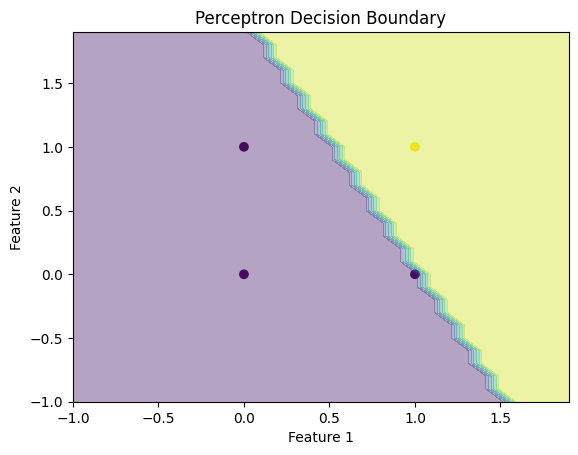

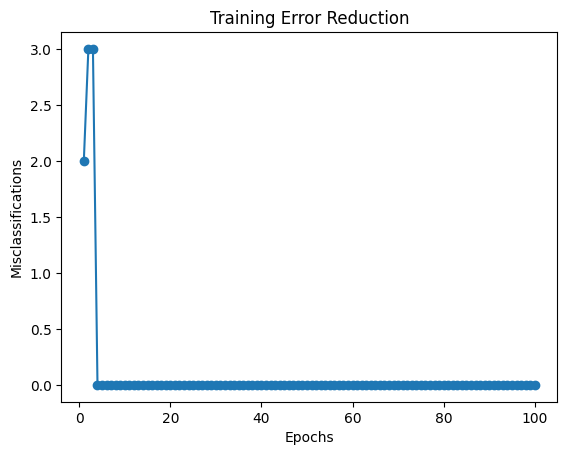

Final weights: [0.2 0.1]
Final bias: -0.20000000000000004


In [1]:
# Import required libraries for numerical operations and visualization
import numpy as np  # Fundamental package for linear algebra and array operations
import matplotlib.pyplot as plt  # Plotting library for visualization

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        """
        Initialize Perceptron with hyperparameters
        learning_rate: Step size for weight updates (default: 0.01)
        n_iters: Number of training iterations/epochs (default: 1000)
        """
        self.learning_rate = learning_rate  # Store learning rate as instance variable
        self.n_iters = n_iters  # Store number of iterations
        self.weights = None  # Initialize weights (will be set during training)
        self.bias = None  # Initialize bias term (will be set during training)
        self.errors = []  # List to track misclassifications per epoch

    def fit(self, X, y):
        """
        Train the Perceptron on input data X with labels y
        X: Feature matrix of shape (n_samples, n_features)
        y: Target labels of shape (n_samples,)
        """
        n_samples, n_features = X.shape  # Get dimensions of input data
        self.weights = np.zeros(n_features)  # Initialize weights to zeros
        self.bias = 0  # Initialize bias to zero

        # Training loop over specified number of epochs
        for _ in range(self.n_iters):
            errors = 0  # Reset error counter for each epoch
            # Iterate through all training samples
            for idx, x_i in enumerate(X):
                # Calculate linear combination of inputs and weights
                linear_output = np.dot(x_i, self.weights) + self.bias
                # Apply activation function to get prediction (0 or 1)
                y_predicted = self.activation_function(linear_output)

                # Perceptron update rule (core learning mechanism)
                update = self.learning_rate * (y[idx] - y_predicted)  # Calculate weight delta
                self.weights += update * x_i  # Update weights
                self.bias += update  # Update bias term
                errors += int(update != 0.0)  # Track misclassifications

            self.errors.append(errors)  # Record errors for this epoch

    def activation_function(self, x):
        """Step activation function converting linear output to class label"""
        return np.where(x >= 0, 1, 0)  # Return 1 if x >= 0, else 0

    def predict(self, X):
        """Make predictions for new input data"""
        linear_output = np.dot(X, self.weights) + self.bias  # Compute linear combination
        return self.activation_function(linear_output)  # Apply activation function

    def plot_decision_boundary(self, X, y):
        """Visualize decision boundary and training data"""
        # Plot original data points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')

        # Define axis ranges for decision boundary visualization
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

        # Create mesh grid for decision surface
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                             np.arange(x2_min, x2_max, 0.1))

        # Predict classes for grid points and reshape for plotting
        Z = self.predict(np.c_[xx1.ravel(), xx2.ravel()])
        Z = Z.reshape(xx1.shape)

        # Plot filled contours for decision regions
        plt.contourf(xx1, xx2, Z, alpha=0.4, cmap='viridis')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Perceptron Decision Boundary')

# Example: AND logic gate implementation
# Define input features (4 samples, 2 features each)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input combinations
y = np.array([0, 0, 0, 1])  # AND gate outputs (only 1 when both inputs are 1)

# Initialize Perceptron with custom parameters
perceptron = Perceptron(learning_rate=0.1, n_iters=100)
perceptron.fit(X, y)  # Train the model

# Make predictions on training data
predictions = perceptron.predict(X)
print(f"Predictions: {predictions}")  # Expected: [0 0 0 1]

# Visualize decision boundary
perceptron.plot_decision_boundary(X, y)
plt.show()

# Plot training error convergence
plt.plot(range(1, len(perceptron.errors) + 1), perceptron.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Misclassifications')
plt.title('Training Error Reduction')
plt.show()

# Display learned parameters
print(f"Final weights: {perceptron.weights}")  # Expected positive weights for AND gate
print(f"Final bias: {perceptron.bias}")  # Expected negative bias to threshold sum


**Multilayer Perceptron using Sklearn**

1. Preparing XOR dataset...
Input features:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Target labels: [0 1 1 0]

2. Initializing MLP classifier...
MLP configuration: MLPClassifier(hidden_layer_sizes=(2,), max_iter=1000, random_state=42,
              verbose=True) 

3. Training neural network...
Iteration 1, loss = 0.75896734
Iteration 2, loss = 0.75843960
Iteration 3, loss = 0.75791450
Iteration 4, loss = 0.75739207
Iteration 5, loss = 0.75687236
Iteration 6, loss = 0.75635540
Iteration 7, loss = 0.75584123
Iteration 8, loss = 0.75532989
Iteration 9, loss = 0.75482141
Iteration 10, loss = 0.75431581
Iteration 11, loss = 0.75381314
Iteration 12, loss = 0.75331343
Iteration 13, loss = 0.75281669
Iteration 14, loss = 0.75232295
Iteration 15, loss = 0.75183224
Iteration 16, loss = 0.75134459
Iteration 17, loss = 0.75086001
Iteration 18, loss = 0.75037851
Iteration 19, loss = 0.74990013
Iteration 20, loss = 0.74942486
Iteration 21, loss = 0.74895274
Iteration 22, loss = 0.74848376
Iteration 23, loss = 0

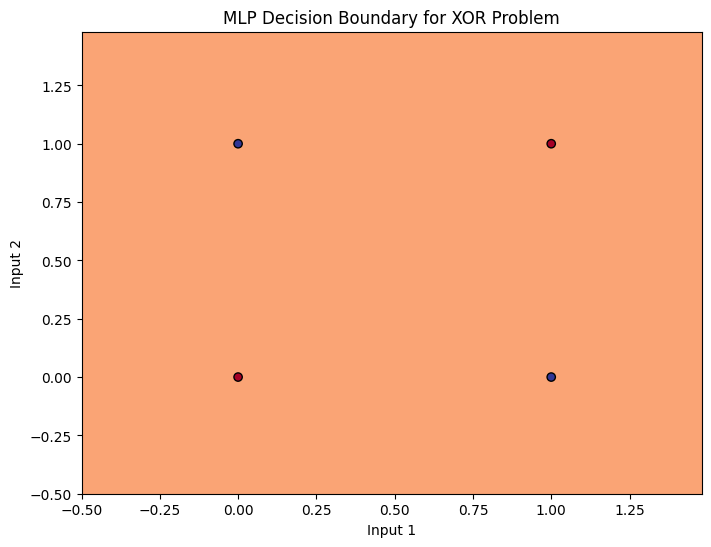

Decision boundary plot displayed

6. Generating learning curve...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:2180: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 2 instead of 5.
  warnings.warn(


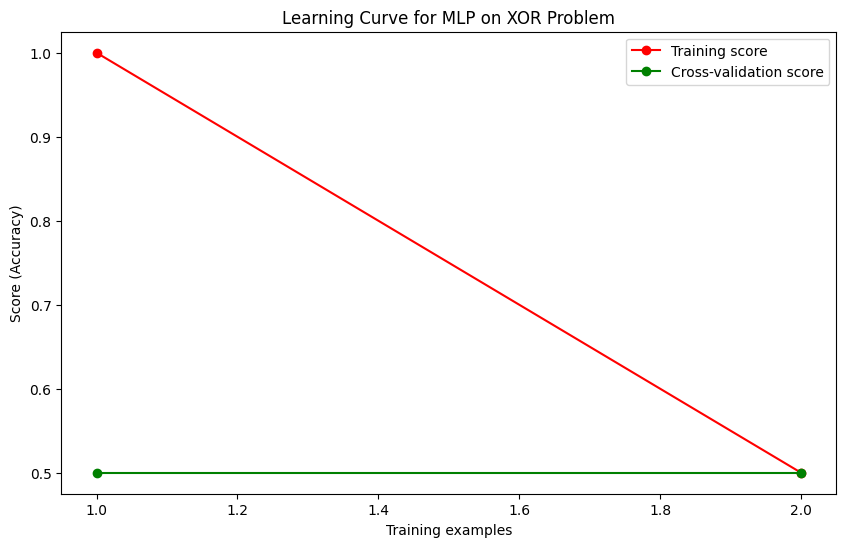

Learning curve displayed

7. Model architecture details:
Number of layers: 2
Neurons per layer: [2, 2]
Input layer weights shape: (2, 2)
Hidden layer weights shape: (2, 1)

Final parameters:
Hidden layer biases: [-0.84257881 -1.01689209]
Output layer biases: [0.1285085]


In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import learning_curve

print("1. Preparing XOR dataset...")
# Create XOR input combinations (4 samples, 2 features each)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# XOR output: 0 for even number of 1s, 1 for odd
y = np.array([0, 1, 1, 0])
print(f"Input features:\n{X}")
print(f"Target labels: {y}\n")

print("2. Initializing MLP classifier...")
# Create Multi-layer Perceptron with:
# - 1 hidden layer (2 neurons)
# - Adam optimizer (adaptive moment estimation)
# - ReLU activation for hidden layers
# - 1000 maximum iterations
mlp = MLPClassifier(
    hidden_layer_sizes=(2,),  # Single hidden layer with 2 neurons
    max_iter=1000,            # Maximum training iterations
    activation='relu',        # Rectified Linear Unit activation
    solver='adam',            # Optimization algorithm
    random_state=42,          # Seed for reproducibility
    verbose=True              # Show training progress
)
print("MLP configuration:", mlp, "\n")

print("3. Training neural network...")
mlp.fit(X, y)
print("\nTraining completed!\n")

print("4. Making predictions...")
predictions = mlp.predict(X)
print(f"Raw predictions: {mlp.predict_proba(X)}")
print(f"Final predictions: {predictions}\n")

print("5. Evaluating model performance...")
accuracy = accuracy_score(y, predictions)
cm = confusion_matrix(y, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(cm, "\n")

def plot_decision_boundary(X, y, model):
    """Visualizes model's decision boundaries"""
    print("Generating decision boundary plot...")
    h = .02  # Mesh grid step size

    # Create mesh grid for visualization
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )
    print(f"Mesh grid range: X({x_min:.1f}-{x_max:.1f}), Y({y_min:.1f}-{y_max:.1f})")

    # Predict on mesh grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot configuration
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='black')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.title('MLP Decision Boundary for XOR Problem')
    plt.show()
    print("Decision boundary plot displayed\n")

plot_decision_boundary(X, y, mlp)

print("6. Generating learning curve...")
# Calculate training/validation scores for different dataset sizes
train_sizes, train_scores, test_scores = learning_curve(
    mlp, X, y,
    cv=2,                   # 5-fold cross-validation
    n_jobs=-1,              # Use all available cores
    train_sizes=np.linspace(.1, 1.0, 5)  # 10% to 100% of training data
)

# Plot learning curve results
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score (Accuracy)")
plt.title("Learning Curve for MLP on XOR Problem")
plt.legend(loc="best")
plt.show()
print("Learning curve displayed\n")

print("7. Model architecture details:")
print(f"Number of layers: {len(mlp.coefs_)}")
print(f"Neurons per layer: {[len(layer) for layer in mlp.coefs_]}")
print("Input layer weights shape:", mlp.coefs_[0].shape)
print("Hidden layer weights shape:", mlp.coefs_[1].shape)
print("\nFinal parameters:")
print("Hidden layer biases:", mlp.intercepts_[0])
print("Output layer biases:", mlp.intercepts_[1])
